In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
### denote answers to homework.

In [7]:
# Load in aqs data, dropping unneeded columns
file1 = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW3_LA_AQS_2023.csv"
aqs= pd.read_csv(file1)
aqs.columns
aqs= aqs.loc[:,['Parameter Name','Duration Description','Date (Local)','Units of Measure','Arithmetic Mean']]
aqs.head()

,Parameter Name,Duration Description,Date (Local),Units of Measure,Arithmetic Mean
0,Ambient Min Temperature,24 HOUR,2023-01-01,Degrees Centigrade,10.100000
1,Nitrogen dioxide (NO2),1 HOUR,2023-01-01,Parts per billion,4.816667
2,Relative Humidity,1 HOUR,2023-01-01,Percent relative humidity,69.916667
3,Outdoor Temperature,1 HOUR,2023-01-01,Degrees Fahrenheit,55.291667
4,Oxides of nitrogen (NOx),1 HOUR,2023-01-01,Parts per billion,5.366667


In [32]:
# Select ozone entries for 1 hr duration from aqs set
O3 = aqs.loc[(aqs['Parameter Name']=='Ozone')&(aqs['Duration Description']== '1 HOUR')]
O3.loc[:,'Arithmetic Mean'] = O3.loc[:,'Arithmetic Mean']*1000 #Convert to ppb
O3.loc[:,'Units of Measure'] = "ppb"
O3

C:\Users\rache\miniconda3\envs\pyleo\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\rache\miniconda3\envs\pyleo\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Parameter Name,Duration Description,Date (Local),Units of Measure,Arithmetic Mean
20,Ozone,1 HOUR,2023-01-01,ppb,31.708
64,Ozone,1 HOUR,2023-01-02,ppb,15.792
204,Ozone,1 HOUR,2023-01-03,ppb,25.000
228,Ozone,1 HOUR,2023-01-04,ppb,20.500
271,Ozone,1 HOUR,2023-01-05,ppb,27.375
...,...,...,...,...,...
21122,Ozone,1 HOUR,2023-09-26,ppb,20.750
21168,Ozone,1 HOUR,2023-09-27,ppb,20.700
21218,Ozone,1 HOUR,2023-09-28,ppb,35.056
21261,Ozone,1 HOUR,2023-09-29,ppb,39.048


In [34]:
# Select NO2 entries for 1 hr duration from aqs set
NO2 = aqs.loc[(aqs['Parameter Name']== 'Nitrogen dioxide (NO2)')&(aqs['Duration Description']== '1 HOUR')]
NO2.loc[:,'Units of Measure'] = "ppb"
NO2

C:\Users\rache\miniconda3\envs\pyleo\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Parameter Name,Duration Description,Date (Local),Units of Measure,Arithmetic Mean
1,Nitrogen dioxide (NO2),1 HOUR,2023-01-01,ppb,4.816667
19,Nitrogen dioxide (NO2),1 HOUR,2023-01-01,ppb,4.550000
29,Nitrogen dioxide (NO2),1 HOUR,2023-01-01,ppb,4.550000
41,Nitrogen dioxide (NO2),1 HOUR,2023-01-01,ppb,4.816667
44,Nitrogen dioxide (NO2),1 HOUR,2023-01-02,ppb,14.720833
...,...,...,...,...,...
21264,Nitrogen dioxide (NO2),1 HOUR,2023-09-29,ppb,8.614286
21297,Nitrogen dioxide (NO2),1 HOUR,2023-09-30,ppb,6.370833
21298,Nitrogen dioxide (NO2),1 HOUR,2023-09-30,ppb,6.370833
21307,Nitrogen dioxide (NO2),1 HOUR,2023-09-30,ppb,7.362500


In [36]:
# Merge ozone and NO2 datasets together
O3_NO2 = O3.merge(NO2, on= ['Date (Local)','Duration Description','Units of Measure'], suffixes= ('_ozone','_NO2'))
O3_NO2

,Parameter Name_ozone,Duration Description,Date (Local),Units of Measure,Arithmetic Mean_ozone,Parameter Name_NO2,Arithmetic Mean_NO2
0,Ozone,1 HOUR,2023-01-01,ppb,31.708,Nitrogen dioxide (NO2),4.816667
1,Ozone,1 HOUR,2023-01-01,ppb,31.708,Nitrogen dioxide (NO2),4.550000
2,Ozone,1 HOUR,2023-01-01,ppb,31.708,Nitrogen dioxide (NO2),4.550000
3,Ozone,1 HOUR,2023-01-01,ppb,31.708,Nitrogen dioxide (NO2),4.816667
4,Ozone,1 HOUR,2023-01-02,ppb,15.792,Nitrogen dioxide (NO2),14.720833
...,...,...,...,...,...,...,...
1087,Ozone,1 HOUR,2023-09-29,ppb,39.048,Nitrogen dioxide (NO2),8.614286
1088,Ozone,1 HOUR,2023-09-30,ppb,30.042,Nitrogen dioxide (NO2),6.370833
1089,Ozone,1 HOUR,2023-09-30,ppb,30.042,Nitrogen dioxide (NO2),6.370833
1090,Ozone,1 HOUR,2023-09-30,ppb,30.042,Nitrogen dioxide (NO2),7.362500


Text(0, 0.5, 'NO2 (ppb)')

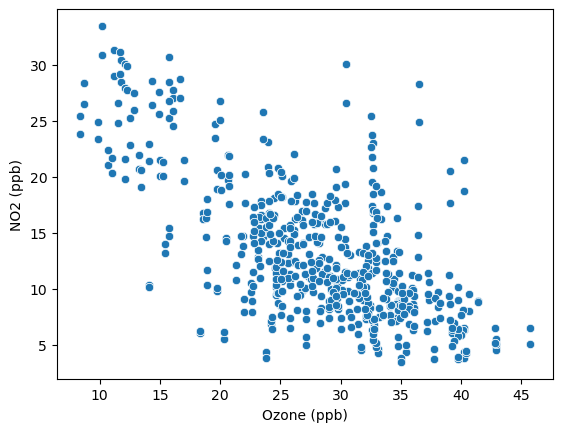

In [40]:
# Scatterplot of O3 vs. NO2
plot= sns.scatterplot(data=O3_NO2, x="Arithmetic Mean_ozone", y="Arithmetic Mean_NO2")
plot.set_xlabel("Ozone (ppb)")
plot.set_ylabel("NO2 (ppb)")

In [37]:
# Convert ozone and NO2 columns in dataframe to arrays
O3_val = np.array(O3_NO2['Arithmetic Mean_ozone']).reshape(-1,1)
NO2_val = np.array(O3_NO2['Arithmetic Mean_NO2'])

In [43]:
# Take 20% of dataset to be a test dataset.
x_tr, x_te, y_tr, y_te = tts(O3_val, NO2_val, test_size= 0.20)

In [44]:
reg = linear_model.LinearRegression()
reg.fit(x_tr, y_tr)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [-0.53844354]
Intercept: 
 28.417306825031943


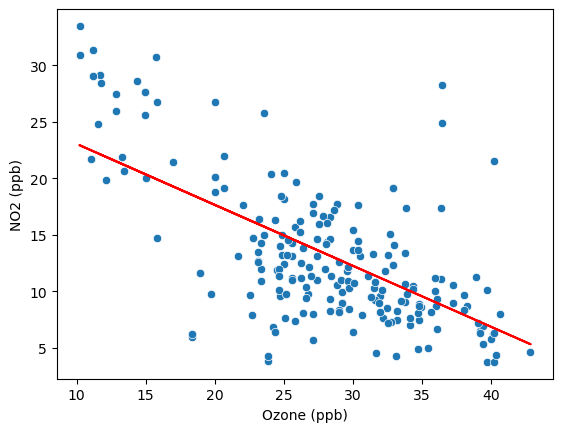

In [50]:
### 1.) Plot the linear fit to the test data.
O3_NO2_test = pd.DataFrame({'x' : x_te.ravel(), 'y' : y_te.ravel()})
O3_NO2_test['yPred'] = reg.predict(x_te)
plot2= sns.scatterplot(data= O3_NO2_test, x= 'x', y= 'y')
plt.plot(O3_NO2_test['x'], O3_NO2_test['yPred'], color= 'red')
plot2.set_xlabel("Ozone (ppb)")
plot2.set_ylabel("NO2 (ppb)")
plt.show()

In [51]:
# Calculate test error
mse(O3_NO2_test['y'], O3_NO2_test['yPred'])
### 2.) The test error for OLS optimization and calculated using mean squared error is about 22.5 ppb. This error seems relatively large considering this is nearly half the range of values for both NO2 and ozone.
### 3.) I think the model performs, at best, okay, but not great due to the high error (high relative to the range of measurements). 

22.463457846659185

In [53]:
# Load in CO2 data, dropping uneeded columns
file2 = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW5_MaunaLoa_CO2.csv"
CO2= pd.read_csv(file2)
CO2= CO2.loc[:,['decimal date','average']]
CO2.head()

,decimal date,average
0,1958.2027,315.70
1,1958.2877,317.45
2,1958.3699,317.51
3,1958.4548,317.24
4,1958.5370,315.86


In [61]:
# Sbuset CO2 data for pre-2000 data
CO2_1 = CO2.loc[CO2['decimal date']<2000] # pre-2000 data

In [62]:
# Fit linear model to pre-2000 data
date_val = np.array(CO2_1['decimal date']).reshape(-1,1)
CO2_val = np.array(CO2_1['average'])
reg2 = linear_model.LinearRegression()
reg2.fit(date_val, CO2_val)
print("Coefficients: \n", reg2.coef_)
print("Intercept: \n", reg2.intercept_)

Coefficients: 
 [1.32328923]
Intercept: 
 -2280.591072256732


In [64]:
# Predict CO2 for all dates in CO2 data
all_date_val = np.array(CO2['decimal date']).reshape(-1,1)
CO2_Pred = reg2.predict(all_date_val)
CO2['Predicted CO2'] = CO2_Pred
CO2

,decimal date,average,Predicted CO2
0,1958.2027,315.70,310.677469
1,1958.2877,317.45,310.789948
2,1958.3699,317.51,310.898723
3,1958.4548,317.24,311.011070
4,1958.5370,315.86,311.119844
...,...,...,...
786,2023.7083,418.51,397.360323
787,2023.7917,418.82,397.470686
788,2023.8750,420.46,397.580916
789,2023.9583,421.86,397.691146


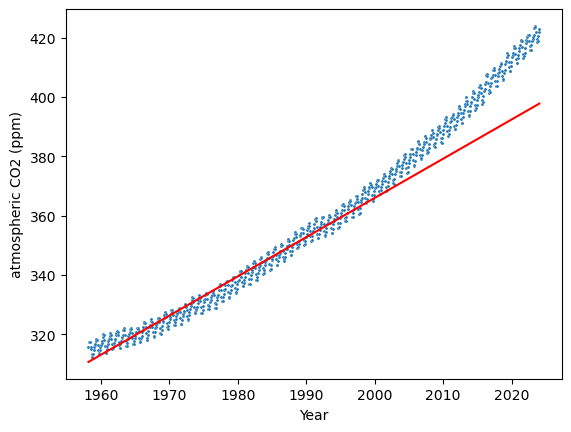

In [67]:
### 1.) Plot the linear fit to the test data.
plot2= sns.scatterplot(data= CO2, x= 'decimal date', y= 'average', s= 5)
plt.plot(CO2['decimal date'], CO2['Predicted CO2'], color= 'red')
plot2.set_xlabel("Year")
plot2.set_ylabel("atmospheric CO2 (ppm)")
plt.show()

In [68]:
# Calculate error for CO2 predictions after 2000
CO2_2 = CO2.loc[CO2['decimal date']>2000]
mse(CO2_2['average'], CO2_2['Predicted CO2'])
# 2.) The linear model predictions for data after 2000 do not match actual data very well. The calculated error between predictions and actual data after 2000 is 200, twice that of the range of values. 
# 3.) The linear model does not fit well as seen in how all actual CO2 values are consistently above those of the predicted values in the graph. Moreover, the difference steadily increases over time, with the largest difference in the most recent data.

200.2461711097249

In [70]:
CO2_2[['average','Predicted CO2']]

,average,Predicted CO2
502,369.45,366.042567
503,369.71,366.152797
504,370.75,366.263027
505,371.98,366.373389
506,371.75,366.483619
...,...,...
786,418.51,397.360323
787,418.82,397.470686
788,420.46,397.580916
789,421.86,397.691146
